In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [18]:
lookalike_model_output = pd.read_csv('Jins_Varghese_Lookalike.csv')

unique_customers = lookalike_model_output['cust_id'].unique()

clustering_data = lookalike_model_output.groupby('cust_id').agg(
    avg_similarity=('score', 'mean'),
    max_similarity=('score', 'max'),
    min_similarity=('score', 'min'),
    count_similar_customers=('similar_cust_id', 'count')
).reset_index()

In [19]:
scaler = StandardScaler()
clustering_features = ['avg_similarity', 'max_similarity', 'min_similarity', 'count_similar_customers']
clustering_data[clustering_features] = scaler.fit_transform(clustering_data[clustering_features])

kmeans = KMeans(n_clusters=4, random_state=42)
clustering_data['kmeans_cluster'] = kmeans.fit_predict(clustering_data[clustering_features])

In [20]:
gmm = GaussianMixture(n_components=4, random_state=42)
clustering_data['gmm_cluster'] = gmm.fit_predict(clustering_data[clustering_features])

dbscan = DBSCAN(eps=1.2, min_samples=5)
clustering_data['dbscan_cluster'] = dbscan.fit_predict(clustering_data[clustering_features])

In [21]:
kmeans_db_index = davies_bouldin_score(clustering_data[clustering_features], clustering_data['kmeans_cluster'])
kmeans_silhouette = silhouette_score(clustering_data[clustering_features], clustering_data['kmeans_cluster'])

gmm_db_index = davies_bouldin_score(clustering_data[clustering_features], clustering_data['gmm_cluster'])
gmm_silhouette = silhouette_score(clustering_data[clustering_features], clustering_data['gmm_cluster'])

print(f"K-Means - DB Index: {kmeans_db_index}, Silhouette Score: {kmeans_silhouette}")
print(f"GMM - DB Index: {gmm_db_index}, Silhouette Score: {gmm_silhouette}")

K-Means - DB Index: 0.7575192671772539, Silhouette Score: 0.4356110885820243
GMM - DB Index: 1.009792003606091, Silhouette Score: 0.20038856549966383


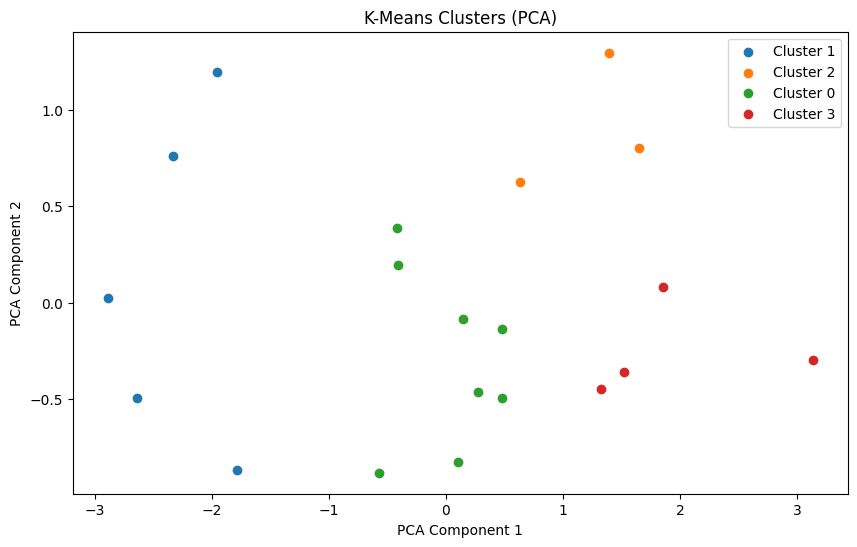

In [22]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clustering_data[clustering_features])
clustering_data['pca_1'] = pca_components[:, 0]
clustering_data['pca_2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
for cluster in clustering_data['kmeans_cluster'].unique():
    cluster_data = clustering_data[clustering_data['kmeans_cluster'] == cluster]
    plt.scatter(cluster_data['pca_1'], cluster_data['pca_2'], label=f'Cluster {cluster}')
plt.title('K-Means Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

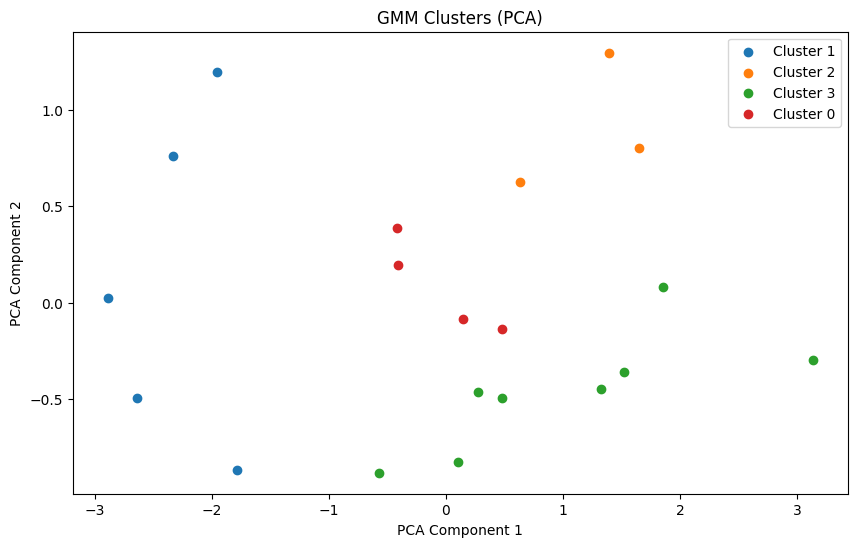

In [23]:
plt.figure(figsize=(10, 6))
for cluster in clustering_data['gmm_cluster'].unique():
    cluster_data = clustering_data[clustering_data['gmm_cluster'] == cluster]
    plt.scatter(cluster_data['pca_1'], cluster_data['pca_2'], label=f'Cluster {cluster}')
plt.title('GMM Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

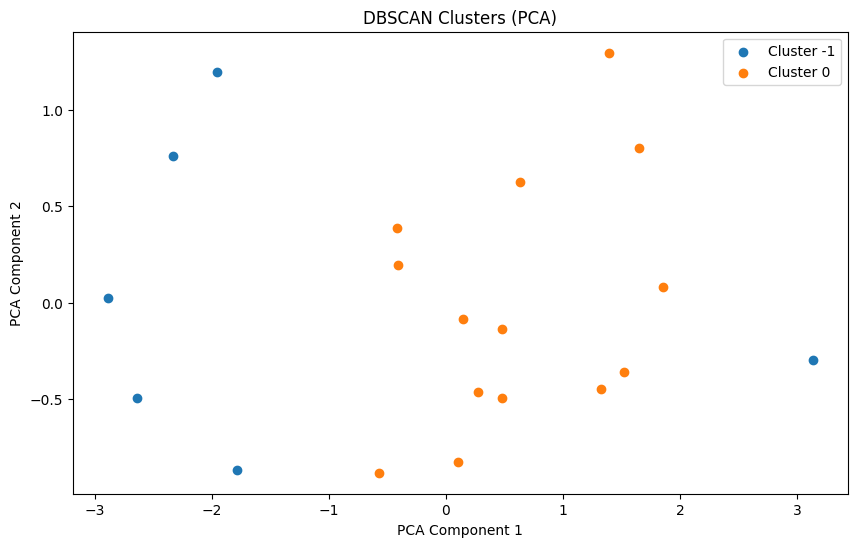

In [24]:
plt.figure(figsize=(10, 6))
for cluster in clustering_data['dbscan_cluster'].unique():
    cluster_data = clustering_data[clustering_data['dbscan_cluster'] == cluster]
    plt.scatter(cluster_data['pca_1'], cluster_data['pca_2'], label=f'Cluster {cluster}')
plt.title('DBSCAN Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()